Color analysis will use PIL instead.

Detected 15 classes: Bear, Bird, Cat, Cow, Deer, Dog, Dolphin, Elephant, Giraffe, Horse, Kangaroo, Lion, Panda, Tiger, Zebra

ANIMAL CLASSIFICATION DATASET - EXPLORATORY DATA ANALYSIS

Total Images: 1944
Number of Classes: 15
Average Images per Class: 129.60

Images per Class:
  Bear        :  125 images
  Bird        :  137 images
  Cat         :  123 images
  Cow         :  131 images
  Deer        :  127 images
  Dog         :  122 images
  Dolphin     :  129 images
  Elephant    :  133 images
  Giraffe     :  129 images
  Horse       :  130 images
  Kangaroo    :  126 images
  Lion        :  131 images
  Panda       :  135 images
  Tiger       :  129 images
  Zebra       :  137 images


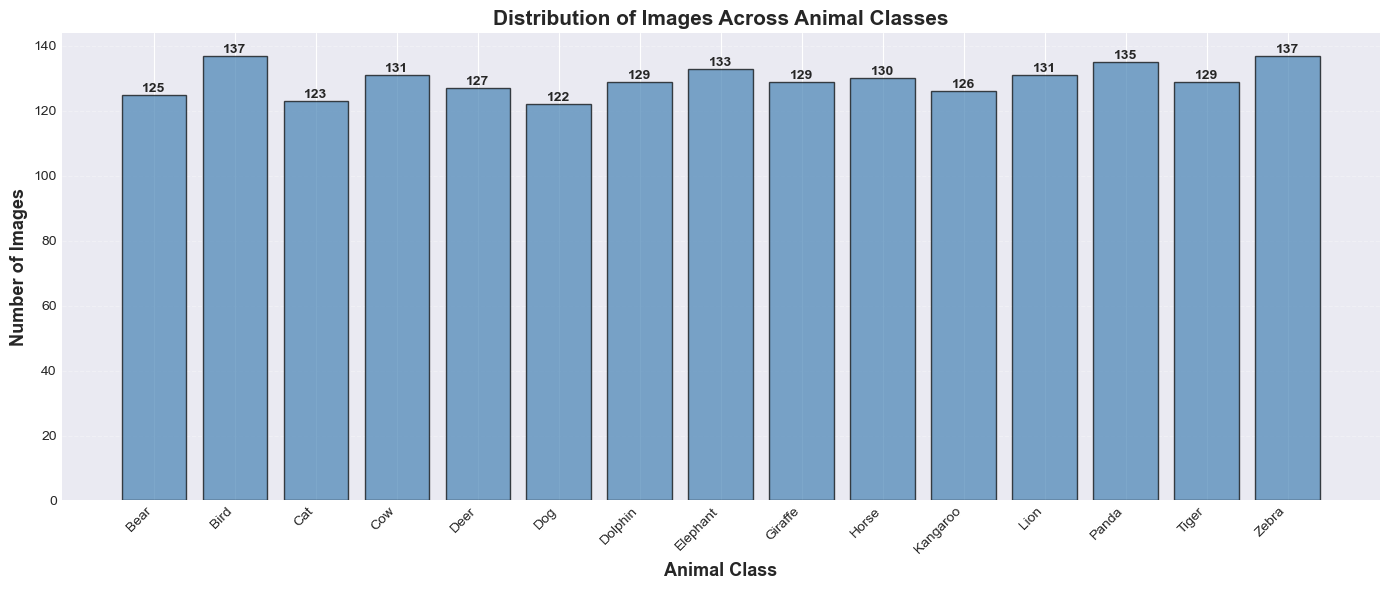


CLASS BALANCE ANALYSIS

Statistics:
  Mean: 129.60
  Median: 129.00
  Std Dev: 4.45
  Min: 122 (Dog)
  Max: 137 (Bird)
  Imbalance Ratio: 1.12

✓ Dataset is relatively BALANCED


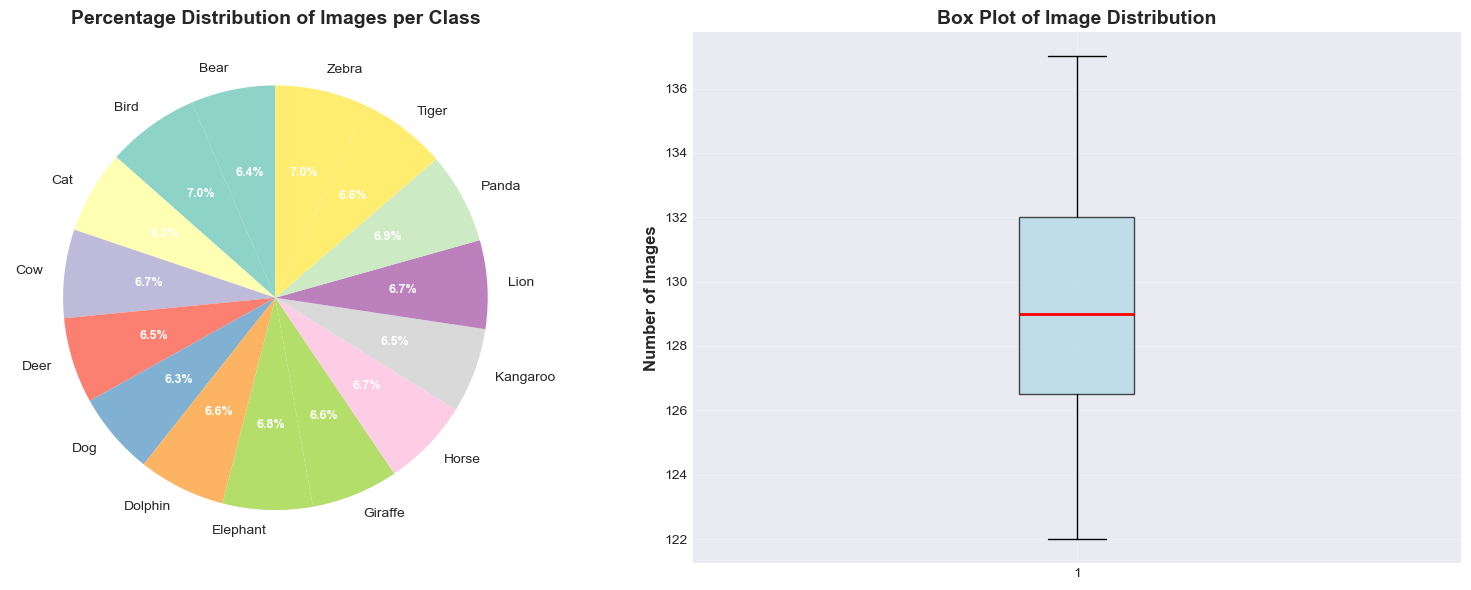


IMAGE PROPERTIES ANALYSIS

Image Dimensions:
  Width  - Min:  224 | Max:  224 | Mean: 224.00 | Std: 0.00
  Height - Min:  224 | Max:  224 | Mean: 224.00 | Std: 0.00
  Aspect Ratio - Min: 1.00 | Max: 1.00 | Mean: 1.00

File Sizes (KB):
  Min: 3.92 | Max: 43.21 | Mean: 18.85

Image Formats:
  JPEG: 750 images

Color Modes:
  RGB: 750 images


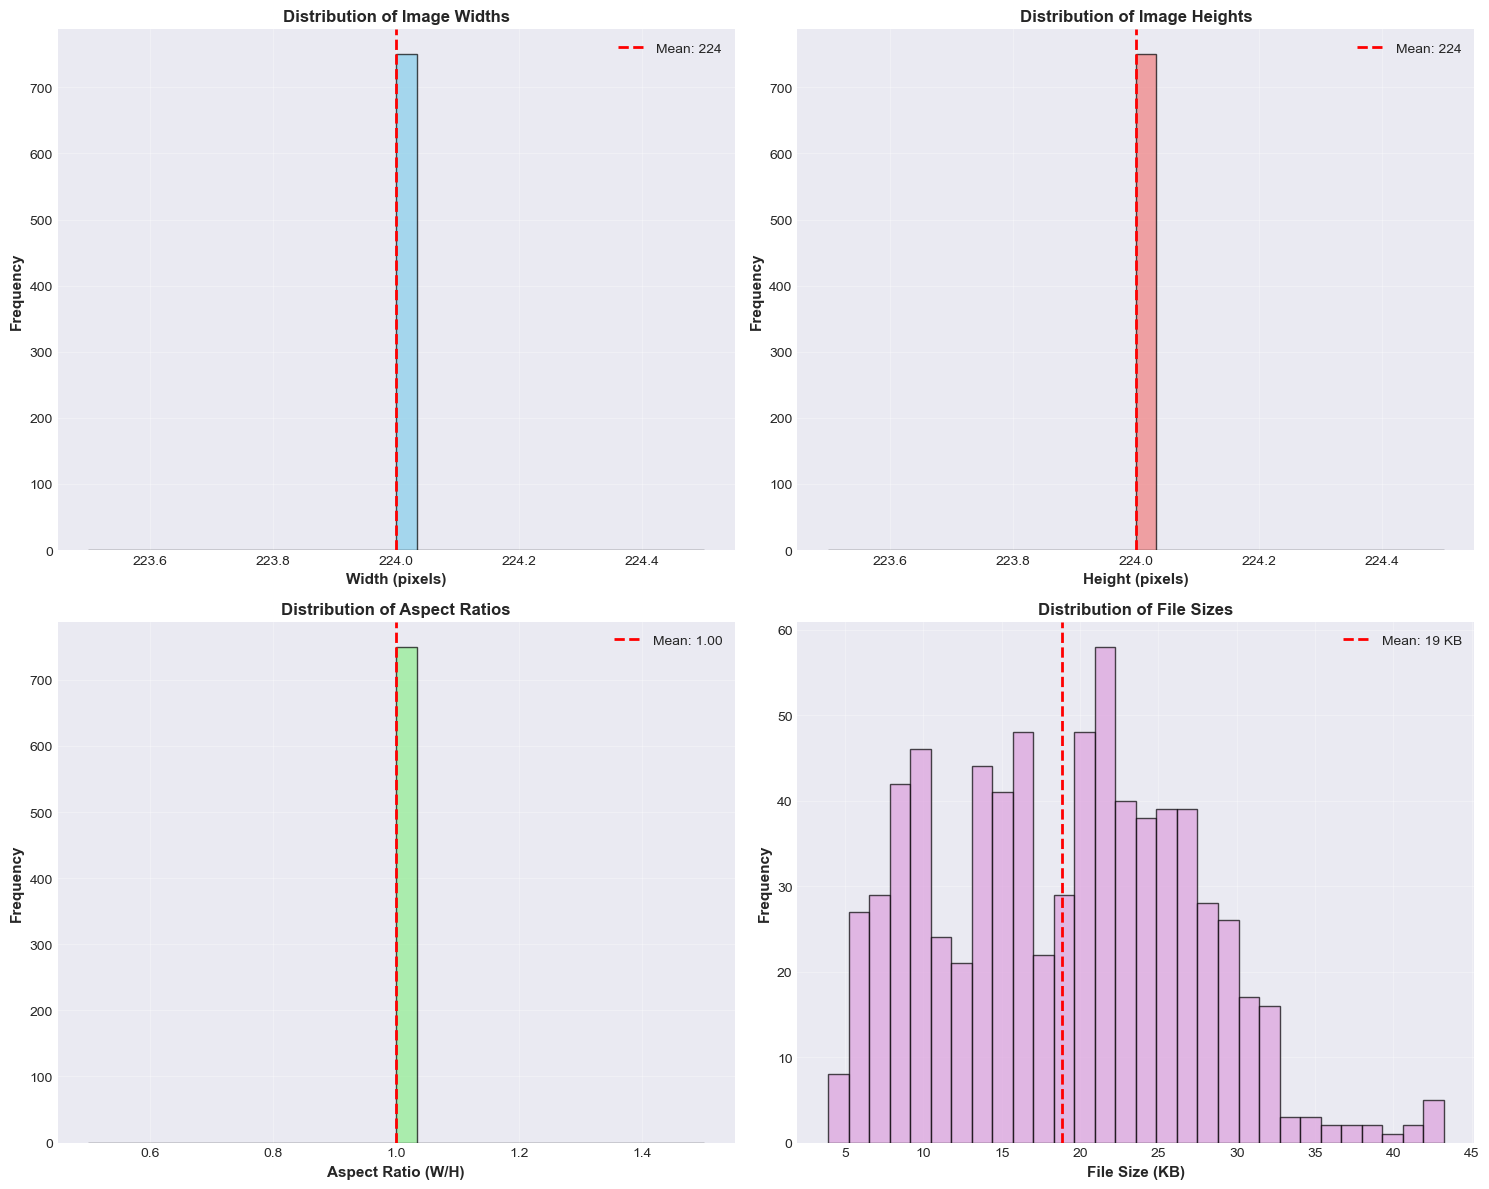


SAMPLE IMAGES FROM EACH CLASS


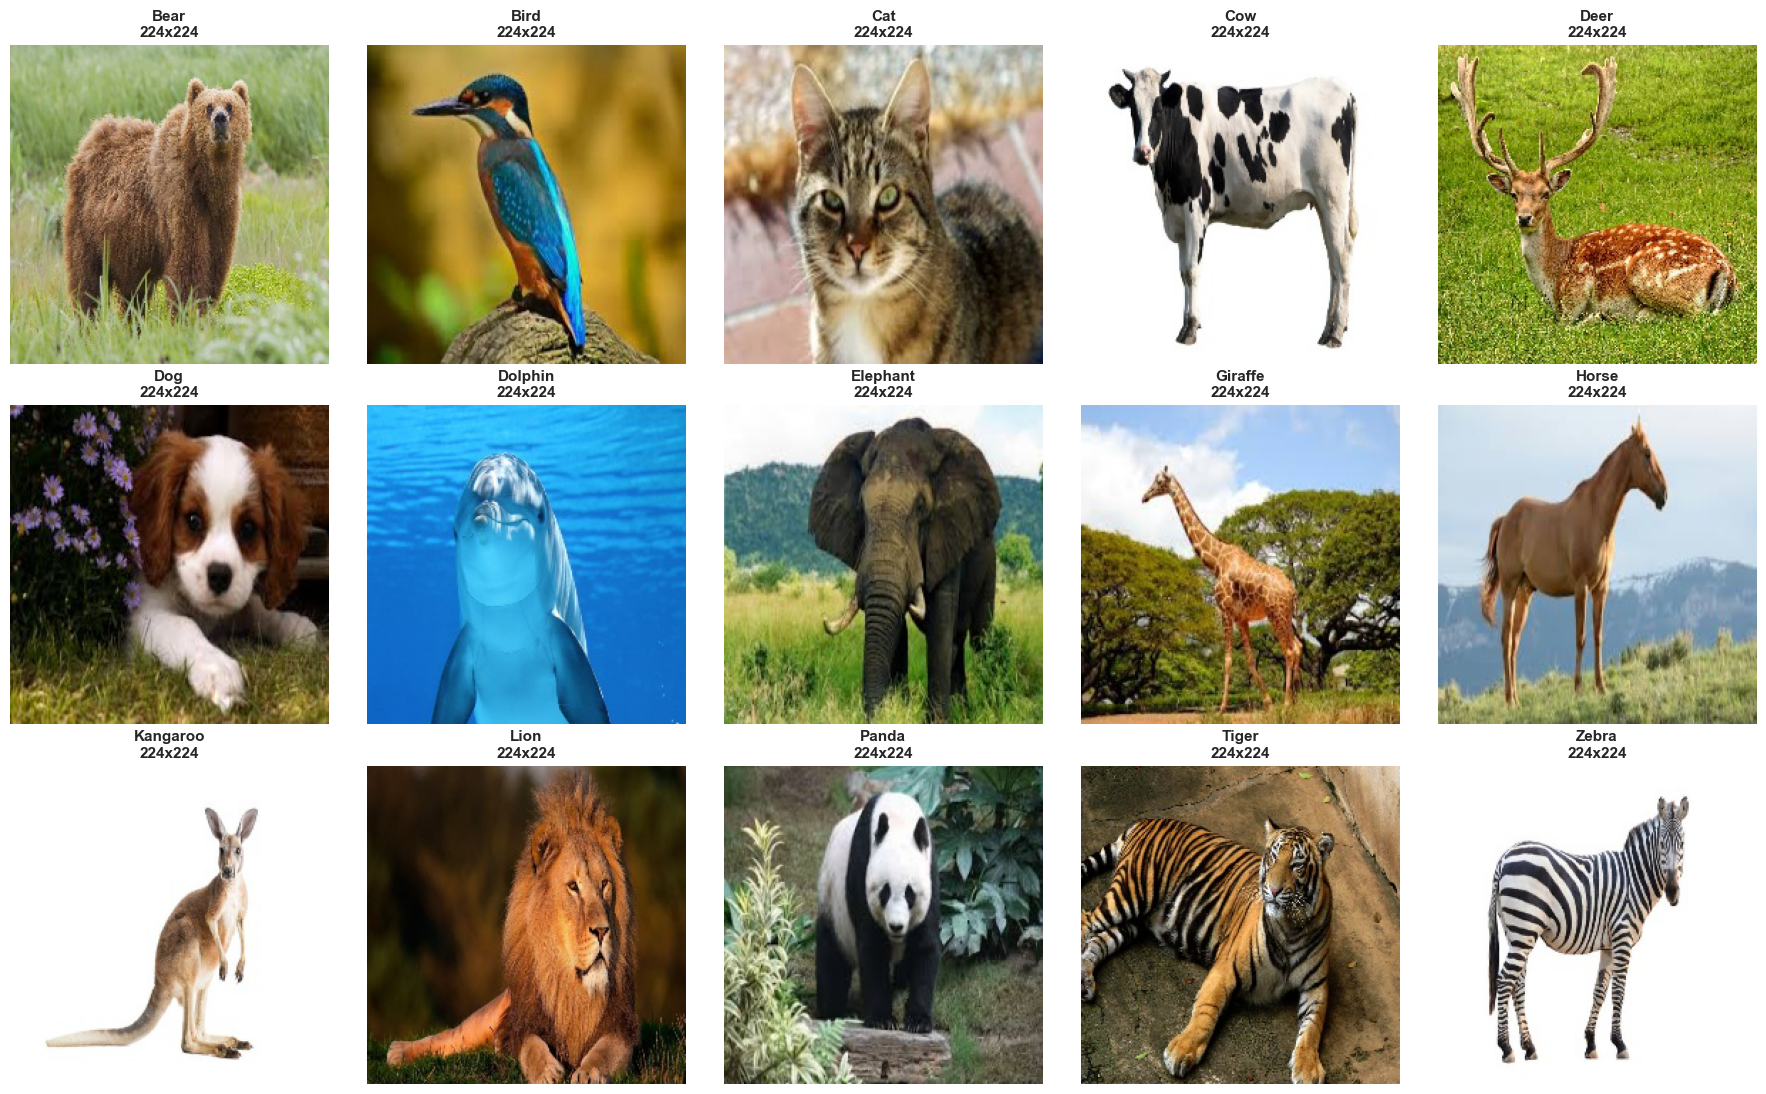


COLOR ANALYSIS (Average RGB Values per Class)


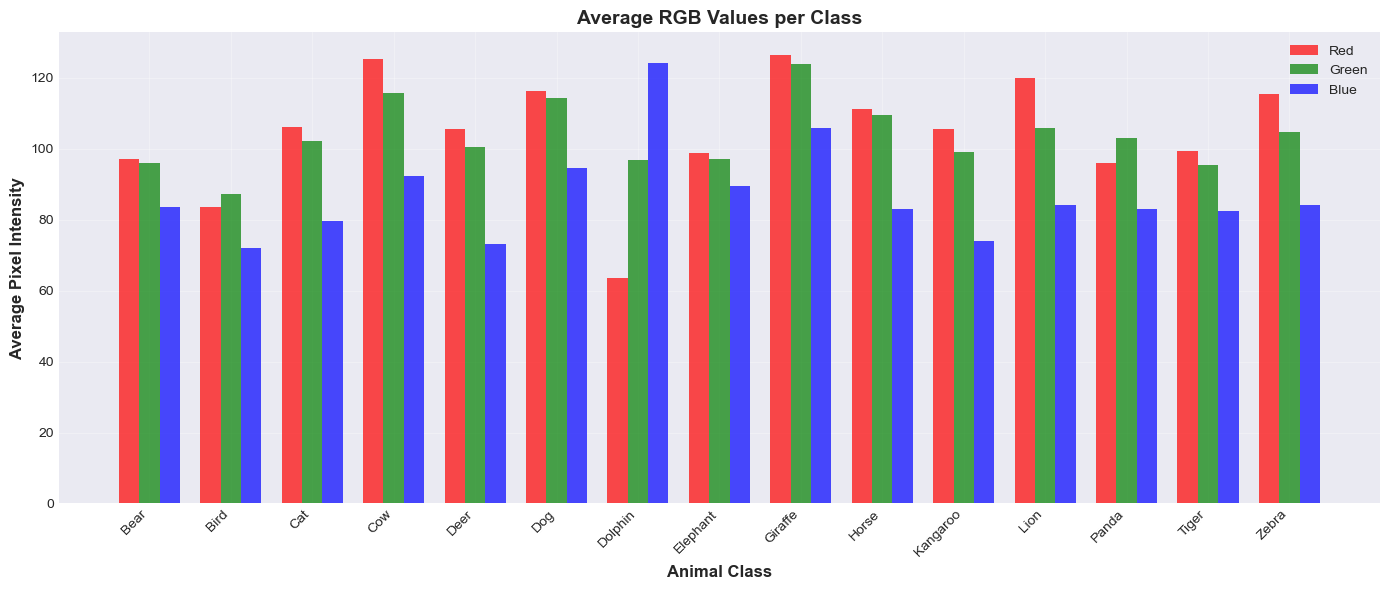


SUMMARY REPORT

Dataset Statistics:
  ✓ Total Images: 1944
  ✓ Number of Classes: 15
  ✓ Images per Class: 122 - 137
  ✓ Average Images per Class: 129.60

Image Properties:
  ✓ Width Range: 224 - 224 pixels (avg: 224)
  ✓ Height Range: 224 - 224 pixels (avg: 224)
  ✓ File Size Range: 3.92 - 43.21 KB (avg: 18.85 KB)

Recommendations:
  1. Consider resizing images to a standard dimension (e.g., 224x224 or 299x299)
  2. Dataset is balanced - proceed with standard training
  3. Normalize pixel values to [0, 1] or standardize with mean/std
  4. Check for corrupted images before training
  5. Consider train/validation/test split: 70/15/15 or 80/10/10

EDA COMPLETE! All plots saved successfully.


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter

# Try to import cv2, use PIL as fallback
try:
    import cv2
    CV2_AVAILABLE = True
except ImportError:
    CV2_AVAILABLE = False
    print("Warning: OpenCV (cv2) not found. Installing it with: pip install opencv-python")
    print("Color analysis will use PIL instead.\n")

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Define dataset path
DATASET_PATH = 'dataset'

# Automatically detect all animal class folders
CLASSES = []
if os.path.exists(DATASET_PATH):
    CLASSES = sorted([d for d in os.listdir(DATASET_PATH) 
                     if os.path.isdir(os.path.join(DATASET_PATH, d)) 
                     and not d.startswith('.')])
    print(f"Detected {len(CLASSES)} classes: {', '.join(CLASSES)}\n")
else:
    print(f"Error: Dataset path '{DATASET_PATH}' not found!")
    print("Please ensure the 'dataset' folder exists in the current directory.")
    exit()

# ============================================================================
# 1. DATASET OVERVIEW
# ============================================================================
print("="*80)
print("ANIMAL CLASSIFICATION DATASET - EXPLORATORY DATA ANALYSIS")
print("="*80)

def explore_dataset():
    """Explore the dataset structure and count images per class"""
    class_counts = {}
    total_images = 0
    
    for class_name in CLASSES:
        class_path = os.path.join(DATASET_PATH, class_name)
        if os.path.exists(class_path):
            images = [f for f in os.listdir(class_path) 
                     if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
            class_counts[class_name] = len(images)
            total_images += len(images)
        else:
            class_counts[class_name] = 0
            print(f"Warning: {class_name} folder not found!")
    
    return class_counts, total_images

class_counts, total_images = explore_dataset()

print(f"\nTotal Images: {total_images}")
print(f"Number of Classes: {len(CLASSES)}")
print(f"Average Images per Class: {total_images/len(CLASSES):.2f}\n")

print("Images per Class:")
for class_name, count in class_counts.items():
    print(f"  {class_name:12s}: {count:4d} images")

# ============================================================================
# 2. BAR CHART - NUMBER OF IMAGES PER CLASS
# ============================================================================
plt.figure(figsize=(14, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), 
               color='steelblue', edgecolor='black', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Animal Class', fontsize=13, fontweight='bold')
plt.ylabel('Number of Images', fontsize=13, fontweight='bold')
plt.title('Distribution of Images Across Animal Classes', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('eda_images_per_class.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 3. CLASS BALANCE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("CLASS BALANCE ANALYSIS")
print("="*80)

counts_array = np.array(list(class_counts.values()))
print(f"\nStatistics:")
print(f"  Mean: {np.mean(counts_array):.2f}")
print(f"  Median: {np.median(counts_array):.2f}")
print(f"  Std Dev: {np.std(counts_array):.2f}")
print(f"  Min: {np.min(counts_array)} ({list(class_counts.keys())[np.argmin(counts_array)]})")
print(f"  Max: {np.max(counts_array)} ({list(class_counts.keys())[np.argmax(counts_array)]})")

# Calculate imbalance ratio
imbalance_ratio = np.max(counts_array) / np.min(counts_array)
print(f"  Imbalance Ratio: {imbalance_ratio:.2f}")

if imbalance_ratio > 1.5:
    print("\n⚠️  Dataset is IMBALANCED - Consider using class weights or augmentation")
else:
    print("\n✓ Dataset is relatively BALANCED")

# ============================================================================
# 4. PIE CHART - CLASS DISTRIBUTION
# ============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(CLASSES)))
wedges, texts, autotexts = ax1.pie(class_counts.values(), 
                                     labels=class_counts.keys(),
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90)
ax1.set_title('Percentage Distribution of Images per Class', 
              fontsize=14, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

# Box plot for class distribution
ax2.boxplot(counts_array, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax2.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax2.set_title('Box Plot of Image Distribution', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eda_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 5. IMAGE PROPERTIES ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("IMAGE PROPERTIES ANALYSIS")
print("="*80)

def analyze_image_properties(sample_size=50):
    """Analyze dimensions, formats, and color properties"""
    widths, heights, aspects = [], [], []
    formats = []
    file_sizes = []
    color_modes = []
    
    for class_name in CLASSES:
        class_path = os.path.join(DATASET_PATH, class_name)
        if not os.path.exists(class_path):
            continue
            
        images = [f for f in os.listdir(class_path) 
                 if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        
        # Sample images
        sample = images[:min(sample_size, len(images))]
        
        for img_name in sample:
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path)
                widths.append(img.width)
                heights.append(img.height)
                aspects.append(img.width / img.height)
                formats.append(img.format)
                color_modes.append(img.mode)
                file_sizes.append(os.path.getsize(img_path) / 1024)  # KB
                img.close()
            except Exception as e:
                print(f"Error reading {img_path}: {e}")
    
    return widths, heights, aspects, formats, file_sizes, color_modes

widths, heights, aspects, formats, file_sizes, color_modes = analyze_image_properties()

print(f"\nImage Dimensions:")
print(f"  Width  - Min: {min(widths):4d} | Max: {max(widths):4d} | Mean: {np.mean(widths):.2f} | Std: {np.std(widths):.2f}")
print(f"  Height - Min: {min(heights):4d} | Max: {max(heights):4d} | Mean: {np.mean(heights):.2f} | Std: {np.std(heights):.2f}")
print(f"  Aspect Ratio - Min: {min(aspects):.2f} | Max: {max(aspects):.2f} | Mean: {np.mean(aspects):.2f}")

print(f"\nFile Sizes (KB):")
print(f"  Min: {min(file_sizes):.2f} | Max: {max(file_sizes):.2f} | Mean: {np.mean(file_sizes):.2f}")

print(f"\nImage Formats:")
format_counts = Counter(formats)
for fmt, count in format_counts.most_common():
    print(f"  {fmt}: {count} images")

print(f"\nColor Modes:")
mode_counts = Counter(color_modes)
for mode, count in mode_counts.most_common():
    print(f"  {mode}: {count} images")

# ============================================================================
# 6. DIMENSION ANALYSIS PLOTS
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Width distribution
axes[0, 0].hist(widths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(np.mean(widths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(widths):.0f}')
axes[0, 0].set_xlabel('Width (pixels)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution of Image Widths', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Height distribution
axes[0, 1].hist(heights, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(np.mean(heights), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(heights):.0f}')
axes[0, 1].set_xlabel('Height (pixels)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Distribution of Image Heights', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Aspect ratio distribution
axes[1, 0].hist(aspects, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(np.mean(aspects), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(aspects):.2f}')
axes[1, 0].set_xlabel('Aspect Ratio (W/H)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distribution of Aspect Ratios', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# File size distribution
axes[1, 1].hist(file_sizes, bins=30, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(np.mean(file_sizes), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(file_sizes):.0f} KB')
axes[1, 1].set_xlabel('File Size (KB)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Distribution of File Sizes', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eda_image_properties.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 7. SAMPLE IMAGES VISUALIZATION
# ============================================================================
print("\n" + "="*80)
print("SAMPLE IMAGES FROM EACH CLASS")
print("="*80)

fig, axes = plt.subplots(3, 5, figsize=(18, 11))
axes = axes.flatten()

for idx, class_name in enumerate(CLASSES):
    class_path = os.path.join(DATASET_PATH, class_name)
    if os.path.exists(class_path):
        images = [f for f in os.listdir(class_path) 
                 if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        if images:
            img_path = os.path.join(class_path, images[0])
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].set_title(f'{class_name}\n{img.width}x{img.height}', 
                               fontsize=11, fontweight='bold')
            axes[idx].axis('off')
            img.close()
        else:
            axes[idx].text(0.5, 0.5, 'No Image', ha='center', va='center')
            axes[idx].set_title(class_name, fontsize=11, fontweight='bold')
            axes[idx].axis('off')

plt.tight_layout()
plt.savefig('eda_sample_images.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 8. COLOR ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("COLOR ANALYSIS (Average RGB Values per Class)")
print("="*80)

def analyze_colors(sample_size=30):
    """Analyze average RGB values per class"""
    color_data = {}
    
    for class_name in CLASSES:
        class_path = os.path.join(DATASET_PATH, class_name)
        if not os.path.exists(class_path):
            continue
            
        images = [f for f in os.listdir(class_path) 
                 if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
        
        r_vals, g_vals, b_vals = [], [], []
        sample = images[:min(sample_size, len(images))]
        
        for img_name in sample:
            img_path = os.path.join(class_path, img_name)
            try:
                if CV2_AVAILABLE:
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        r_vals.append(np.mean(img[:,:,0]))
                        g_vals.append(np.mean(img[:,:,1]))
                        b_vals.append(np.mean(img[:,:,2]))
                else:
                    # Use PIL as fallback
                    img = Image.open(img_path).convert('RGB')
                    img_array = np.array(img)
                    r_vals.append(np.mean(img_array[:,:,0]))
                    g_vals.append(np.mean(img_array[:,:,1]))
                    b_vals.append(np.mean(img_array[:,:,2]))
            except Exception as e:
                continue
        
        if r_vals:
            color_data[class_name] = {
                'R': np.mean(r_vals),
                'G': np.mean(g_vals),
                'B': np.mean(b_vals)
            }
    
    return color_data

color_data = analyze_colors()

# Plot color analysis
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(color_data))
width = 0.25

r_vals = [color_data[c]['R'] for c in color_data.keys()]
g_vals = [color_data[c]['G'] for c in color_data.keys()]
b_vals = [color_data[c]['B'] for c in color_data.keys()]

ax.bar(x - width, r_vals, width, label='Red', color='red', alpha=0.7)
ax.bar(x, g_vals, width, label='Green', color='green', alpha=0.7)
ax.bar(x + width, b_vals, width, label='Blue', color='blue', alpha=0.7)

ax.set_xlabel('Animal Class', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Pixel Intensity', fontsize=12, fontweight='bold')
ax.set_title('Average RGB Values per Class', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(color_data.keys(), rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eda_color_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 9. SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("SUMMARY REPORT")
print("="*80)

print(f"""
Dataset Statistics:
  ✓ Total Images: {total_images}
  ✓ Number of Classes: {len(CLASSES)}
  ✓ Images per Class: {min(class_counts.values())} - {max(class_counts.values())}
  ✓ Average Images per Class: {np.mean(list(class_counts.values())):.2f}

Image Properties:
  ✓ Width Range: {min(widths)} - {max(widths)} pixels (avg: {np.mean(widths):.0f})
  ✓ Height Range: {min(heights)} - {max(heights)} pixels (avg: {np.mean(heights):.0f})
  ✓ File Size Range: {min(file_sizes):.2f} - {max(file_sizes):.2f} KB (avg: {np.mean(file_sizes):.2f} KB)

Recommendations:
  1. Consider resizing images to a standard dimension (e.g., 224x224 or 299x299)
  2. {'Apply data augmentation to balance classes' if imbalance_ratio > 1.5 else 'Dataset is balanced - proceed with standard training'}
  3. Normalize pixel values to [0, 1] or standardize with mean/std
  4. Check for corrupted images before training
  5. Consider train/validation/test split: 70/15/15 or 80/10/10
""")

print("="*80)
print("EDA COMPLETE! All plots saved successfully.")
print("="*80)

In [3]:
!pip install cv2

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
